<a href="https://colab.research.google.com/github/facundodelga/TP-IA-sugeno/blob/main/MamdaniTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Le proponen automatizar el trabajo de un calderista. Sus variables son:

*   La **TEMPERATURA EXTERIOR** (exterior a la caldera, es decir, la temperatura de las habitaciones del edificio)
*   La **TEMPERATURA INTERIOR** (de la caldera)
*   El tamaño de la llama (**COMBUSTION**).



*   Cuando la **TEMPERATURA EXTERIOR** es **BAJA** , la **COMBUSTION** debe ser **ALTA**.
*   Cuando la **TEMPERATURA EXTERIOR** es **MEDIA**, la **COMBUSTION** debe ser **MODERADA**
*   Cuando la **TEMPERATURA EXTERIOR** es **ALTA**, la **COMBUSTION** debe estar en **PILOTO**.
*   Cuando la **TEMPERATURA INTERIOR** sea **ALTA**, la **COMBUSTION** debe **LIMITARSE LIGERAMENTE**
*   Cuando la **TEMPERATURA INTERIOR** sea **CRITICA**, la **COMBUSTION** debe ser **REDUCIDA**
*   Si la **TEMPERATURA INTERIOR** no es **ALTA o CRITICA**, **no debería interesarnos**

Explicite las reglas que ha elegido para esta tarea, y de ejemplos de valores de entrada y salida.

In [11]:
!pip install scikit-fuzzy

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [13]:
#Rango de variables de entrada
t_ext = np.arange(-20, 50, 1)
t_int = np.arange(30, 100, 1)

#Rango de variable de salida
combustion = np.arange(0,100,1)

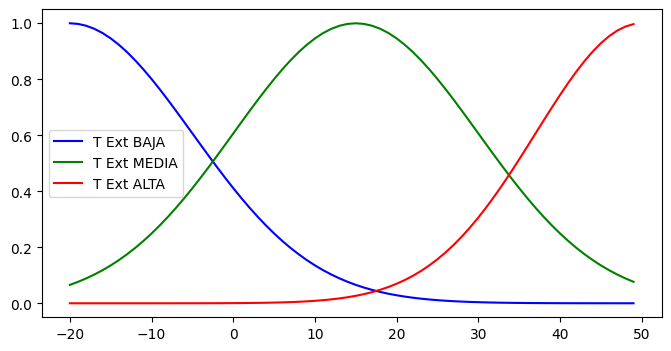

In [36]:
#Funcion de pertenencia de temperatura exterior
t_ext_baja = fuzz.gaussmf(t_ext,-20,15)
t_ext_media = fuzz.gaussmf(t_ext,15,15)
t_ext_alta = fuzz.gaussmf(t_ext,50,13)


#Grafico funciones de pertenencia
fig, ax = plt.subplots(nrows=1, figsize=(8, 4)) #Objeto del grafico

ax.plot(t_ext,t_ext_baja, color = "blue", label = "T Ext BAJA")
ax.plot(t_ext,t_ext_media, color = "green", label = "T Ext MEDIA")
ax.plot(t_ext,t_ext_alta, color = "red", label = "T Ext ALTA")
ax.legend()



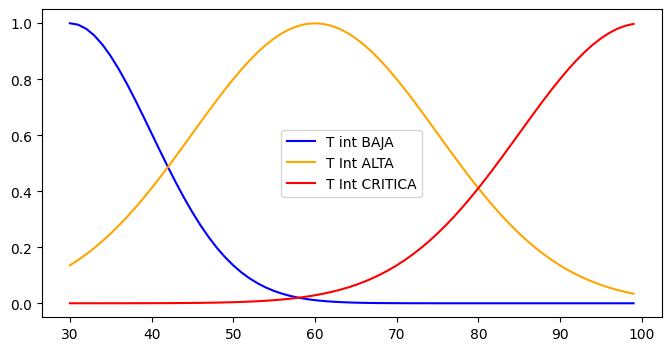

In [35]:
# #Funcion de pertenencia de temperatura interior
t_int_baja = fuzz.gaussmf(t_int,30,10)
t_int_alta = fuzz.gaussmf(t_int,60,15)
t_int_critica = fuzz.gaussmf(t_int,100,15)


#Grafico funciones de pertenencia
fig, ay = plt.subplots(nrows=1, figsize=(8, 4))

ay.plot(t_int,t_int_baja, color = "blue", label = "T int BAJA")
ay.plot(t_int,t_int_alta, color = "orange", label = "T Int ALTA")
ay.plot(t_int,t_int_critica, color = "red", label = "T Int CRITICA")
ay.legend()

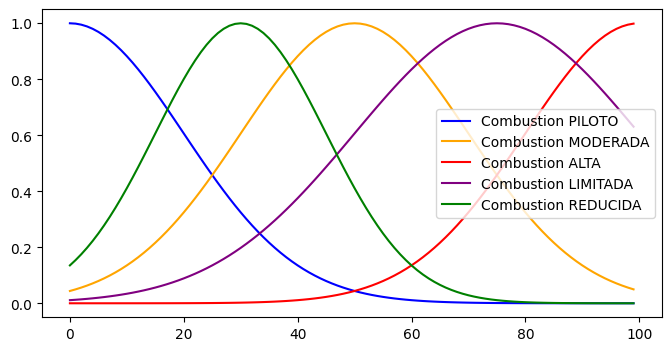

In [27]:
#Funcion de pertenencia de Combustion
c_piloto = fuzz.gaussmf(combustion,0,20)
c_moderada = fuzz.gaussmf(combustion,50,20)
c_alta = fuzz.gaussmf(combustion,100,20)

c_limitada = fuzz.gaussmf(combustion,75,25)
c_reducida = fuzz.gaussmf(combustion,30,15)


#Grafico funciones de pertenencia
fig, az = plt.subplots(nrows=1, figsize=(8, 4))

az.plot(combustion,c_piloto, color = "blue", label = "Combustion PILOTO")
az.plot(combustion,c_moderada, color = "orange", label = "Combustion MODERADA")
az.plot(combustion,c_alta, color = "red", label = "Combustion ALTA")
az.plot(combustion,c_limitada, color = "purple", label = "Combustion LIMITADA")
az.plot(combustion,c_reducida, color = "green", label = "Combustion REDUCIDA")
az.legend()

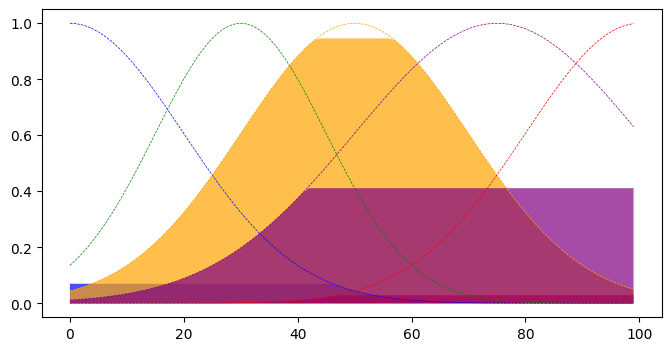

In [38]:
# Datos de entrada
temp_ext = 20  #t_ext = np.arange(-20, 50, 1)
temp_int = 40 #t_int = np.arange(30, 100, 1)

# Fuzzificacion
ext_nivel_alta = fuzz.interp_membership(t_ext,t_ext_alta,temp_ext)
ext_nivel_media = fuzz.interp_membership(t_ext,t_ext_media,temp_ext)
ext_nivel_baja = fuzz.interp_membership(t_ext,t_ext_baja,temp_ext)

int_nivel_baja = fuzz.interp_membership(t_int,t_int_baja,temp_int)
int_nivel_alta = fuzz.interp_membership(t_int,t_int_alta,temp_int)
int_nivel_critica = fuzz.interp_membership(t_int,t_int_critica,temp_int)

# Asigno las reglas
regla1 = np.fmin(ext_nivel_alta,c_piloto) # Cuando la TEMPERATURA EXTERIOR es ALTA , la COMBUSTION debe ser PILOTO.
regla2 = np.fmin(ext_nivel_media,c_moderada) # Cuando la TEMPERATURA EXTERIOR es MEDIA, la COMBUSTION debe ser MODERADA
regla3 = np.fmin(ext_nivel_baja, c_alta) # Cuando la TEMPERATURA EXTERIOR es BAJA, la COMBUSTION debe ser ALTA

regla4 = np.fmin(int_nivel_alta,c_limitada) # Cuando la TEMPERATURA INTERIOR sea ALTA, la COMBUSTION debe LIMITARSE LIGERAMENTE
regla5 = np.fmin(int_nivel_critica,c_reducida) # Cuando la TEMPERATURA INTERIOR sea CRITICA, la COMBUSTION debe ser REDUCIDA

# Si la TEMPERATURA INTERIOR no es ALTA o CRITICA, no debería interesarnos

fig, af = plt.subplots(figsize=(8, 4))

af.fill_between(combustion, regla1, facecolor='b', alpha=0.7)
af.plot(combustion, c_piloto, 'b', linewidth=0.5, linestyle='--')

af.fill_between(combustion, regla2, facecolor='orange', alpha=0.7)
af.plot(combustion, c_moderada, 'orange', linewidth=0.5, linestyle='--')

af.fill_between(combustion, regla3, facecolor='r', alpha=0.7)
af.plot(combustion, c_alta, 'red', linewidth=0.5, linestyle='--')

af.fill_between(combustion, regla4, facecolor='purple', alpha=0.7)
af.plot(combustion, c_limitada, 'purple', linewidth=0.5, linestyle='--')

af.fill_between(combustion, regla5, facecolor='green', alpha=0.7)
af.plot(combustion, c_reducida, 'green', linewidth=0.5, linestyle='--')


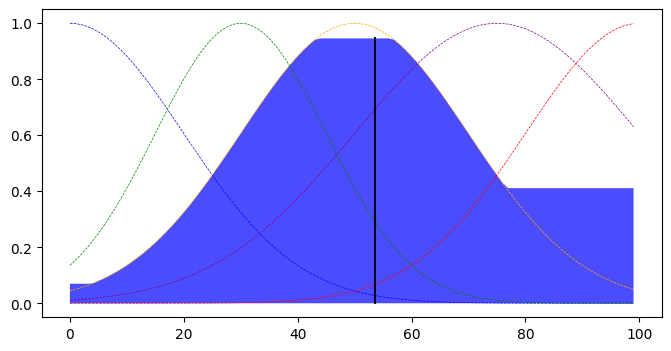

In [41]:
agregacion = np.fmax(regla1,np.fmax(regla2,np.fmax(regla3,np.fmax(regla4,regla5))))

salida = fuzz.defuzz(combustion,agregacion,"centroid")

salida_activada = fuzz.interp_membership(combustion, agregacion, salida)

fig, af = plt.subplots(figsize=(8, 4))

af.plot(combustion, c_piloto, 'b', linewidth=0.5, linestyle='--')
af.plot(combustion, c_moderada, 'orange', linewidth=0.5, linestyle='--')
af.plot(combustion, c_alta, 'red', linewidth=0.5, linestyle='--')
af.plot(combustion, c_limitada, 'purple', linewidth=0.5, linestyle='--')
af.plot(combustion, c_reducida, 'green', linewidth=0.5, linestyle='--')

af.fill_between(combustion,agregacion, facecolor='b', alpha=0.7)
af.plot([salida, salida], [0, salida_activada], 'k', linewidth=1.5, alpha=0.9)